In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline

In [3]:
#load the datasets
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

### Exploring the training data

In [4]:
print("Training data shape : " + str(train.shape))

Training data shape : (42000, 785)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [7]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [8]:
df_x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

1

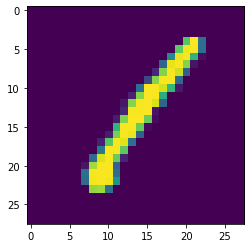

In [10]:
print_image(0, df_x)
df_y[0]

<AxesSubplot:xlabel='label', ylabel='count'>

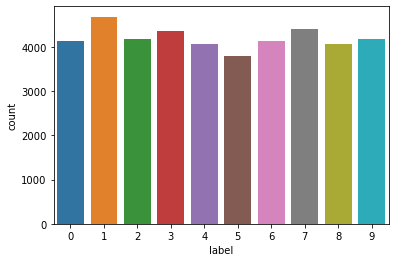

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df_y)

In [12]:
df_y.value_counts().sort_index()


0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [13]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [14]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.96       860
           3       0.95      0.94      0.95       863
           4       0.97      0.96      0.97       827
           5       0.96      0.97      0.96       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.96       899
           8       0.95      0.95      0.95       768
           9       0.95      0.94      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Report
[[793   0   0   1   2   2   6   0   9   0]
 [  0 947   6   3   2   1   0   0   2   0]
 [  4   1 833   6   2   2   3   5   4   0]
 [  2   1  13 813   0   9   2   8  11   4]
 [  2   2   0   0 796   0   5 

In [16]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 23.997902 secs
CPU times: user 24 s, sys: 25.6 ms, total: 24 s
Wall time: 24 s


In [17]:
# Check output submission format
data = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
data.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [18]:
pred = rf.predict(test)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

In [19]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


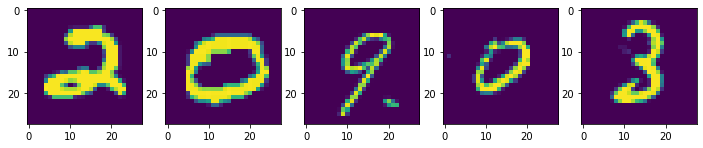

In [20]:
# Check prediction visually
plt.figure(figsize=(12,10))
for i in range(0,5) :
    plt.subplot(1, 5, i+1)
    print_image(i, test)


## 2. PCA 

In [21]:
df_x.shape, test.shape

((42000, 784), (28000, 784))

In [22]:
combined = pd.concat([df_x, test])
combined.shape

(70000, 784)

154 principal components account for 95 percent of the variability in the MNIST dataset.


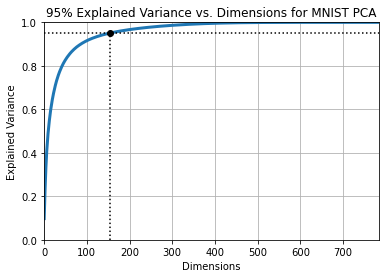

In [23]:
from sklearn.decomposition import PCA
# PCA automatically takes care of centering the data!
#To better understand the problem, I want to start by plotting Explained Variance vs. Dimensions:

pca = PCA()
pca.fit(combined)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("{} principal components account for 95 percent of the variability in the MNIST dataset.".format(round(d)))

plt.plot(cumsum, linewidth = 3)
plt.axis([0,784,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([0,784],[0.95,0.95],"k:")
plt.plot([d,d],[0,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title("95% Explained Variance vs. Dimensions for MNIST PCA")
plt.show()

### 3. Train with PCA

In [24]:
pca = PCA(n_components = 154)
pca.fit(combined)

PCA(n_components=154)

In [25]:
len(pca.components_)

154

In [26]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(test)

In [27]:
y_train.shape, X_train_reduced.shape

((33600,), (33600, 154))

In [28]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 56.571831 secs
CPU times: user 56.5 s, sys: 49.3 ms, total: 56.6 s
Wall time: 56.6 s


In [29]:
pred = rf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf.csv",index=False)

### 5. Fixing the flaw

In [30]:
# Separate the training set from PCA 
pca = PCA(n_components = 154)
pca.fit(X_train)

PCA(n_components=154)

In [31]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(test)

In [32]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 56.61123 secs
CPU times: user 56.6 s, sys: 31.7 ms, total: 56.6 s
Wall time: 56.6 s


In [33]:
pred = rf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf_fixed.csv",index=False)

### 6. K-Means Clustering

In [34]:
#normalize data
X = X_train.astype(float) / 255.

In [35]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)
# Fit the model to the training data
kmeans.fit(X)
kmeans.labels_

10


array([8, 5, 8, ..., 0, 5, 8], dtype=int32)

In [36]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
     
        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
         
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

NameError: name 'Y' is not defined

In [37]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

NameError: name 'Y' is not defined